In [10]:
using PyPlot;

# Problem 2

Consider a particle in two dimensions, $x$ and $y$. The particle has mass $m$, equal in both directions. The potential energy is $V=\frac{1}{2}k(x^2+y^2)$. Work out the equations of motion. Show that there are circular orbits and that all orbits have the same period. Prove explicitly that the total energy is conserved.

## Solution

The force on the particle is given by 
$$
\begin{align*}
    F &= - \nabla V\\
    &= -k\begin{bmatrix}
    x\\
    y
    \end{bmatrix}
\end{align*}
$$

Using Newton's law, the equations of motion are given by the differential equation
$$
\begin{align*}
m\ddot{r}(t) &= -k\begin{bmatrix}
    x(t)\\
    y(t)
    \end{bmatrix}
\end{align*}
$$

The equation $\ddot{x}(t) = -\frac{k}{m}x(t)$ has solution $x(t) = x_0\cos(\omega t) + \frac{v_{0x}}{\omega} \sin(\omega t)$ where $\omega = \sqrt{k/m}$ as given by Exercise 4 of chapter 3. So the equations of motion are 

$$
\begin{align*}
x(t) &= x_0\cos(\omega t) + \frac{v_{0x}}{\omega} \sin(\omega t)\\
y(t) &= y_0\cos(\omega t) + \frac{v_{0y}}{\omega} \sin(\omega t)
\end{align*}
$$

The kinetic energy of the particle is given by 
$$
\begin{align*}
T &= 0.5 m \left[\left(-x_0\omega \sin(\omega t) + v_{0x} \cos(\omega t)\right)^2 + \left(-y_0 \omega \sin(\omega t) + v_{0y} \cos(\omega t)\right)^2\right]\\
&= 0.5m\left(x_0^2\omega^2\sin^2(\omega t) + v_{0x}^2\cos^2(\omega t) - 2x_0v_{0x}\omega\sin(\omega t)\cos(\omega t)
+ y_0^2\omega^2\sin^2(\omega t) + v_{0y}^2\cos^2(\omega t) - 2y_0v_{0y}\omega\sin(\omega t)\cos(\omega t)\right)\\
&= 0.5m\left(\omega^2(x_0^2+y_0^2)\sin^2(\omega t) + (v_{0x}^2 + v_{0y}^2)\cos^2(\omega t) - 2(x_0v_{0x} + y_0v_{0y})\omega\sin(\omega t)\cos(\omega t) \right)\\
&= 0.5m\left(k/m(x_0^2+y_0^2)\sin^2(\omega t) + (v_{0x}^2 + v_{0y}^2)\cos^2(\omega t) - 2(x_0v_{0x} + y_0v_{0y})\omega \sin(\omega t)\cos(\omega t) \right)
\end{align*}
$$

The potential energy is given by 
$$
\begin{align*}
V &= 0.5k\left[\left(x_0 \cos(\omega t) + v_{0x}/\omega \sin(\omega t)\right)^2 + \left(y_0 \cos(\omega t) + v_{0y}/\omega \sin(\omega t)\right)^2\right]\\
&= 0.5k\left((x_0^2+y_0^2)\cos^2(\omega t) + \frac{1}{\omega^2}(v_{0x}^2 + v_{0y}^2)\sin^2(\omega t) - \frac{2}{\omega}(x_0v_{0x} + y_0v_{0y})\sin(\omega t)\cos(\omega t) \right)\\
&= 0.5k\left((x_0^2+y_0^2)\cos^2(\omega t) + \frac{m}{k}(v_{0x}^2 + v_{0y}^2)\sin^2(\omega t) - \frac{2}{\omega}(x_0v_{0x} + y_0v_{0y})\sin(\omega t)\cos(\omega t) \right)
\end{align*}
$$

The total energy of the system is then
$$
\begin{align*}
E &= T + V\\
&= 0.5k(x_0^2+y_0^2) + 0.5 m(v_{0x}^2 + v_{0y}^2)
\end{align*}
$$

which is independent of time, showing that energy is conserved.

Circular orbits exist when 
$$
\begin{align*}
x_0^2 + y_0^2 &= \frac{m}{k} (v_{0x}^2 + v_{0y}^2)\\
x_0v_{0x} &= -y_0v_{0y}\\
\end{align*}
$$

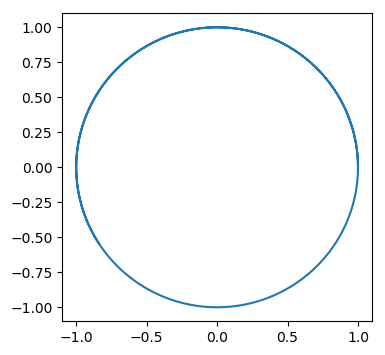

In [23]:
k = 1
m = 1
omega = sqrt(k / m);

x0 = vec([1 0])
v0 = vec([0 omega])

t_vals = vec(LinRange(0, 10, 1000));
position = x0 * cos.(omega * transpose(t_vals)) + v0 / omega * sin.(omega * transpose(t_vals));

figure(figsize=(4,4))
plot(position[1,:], position[2,:]);

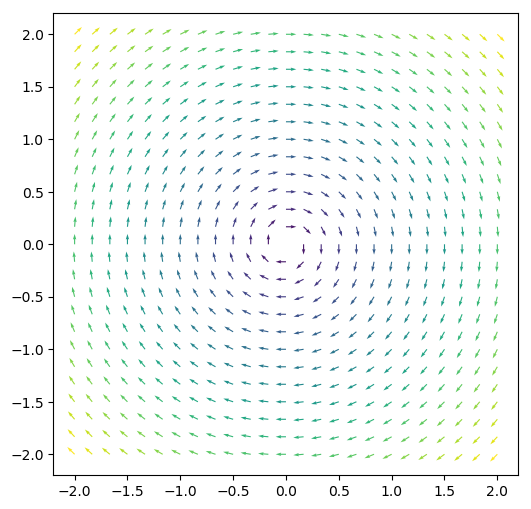

In [12]:
k = 1
m = 1
A = [0 1; -k/m 0]

x_vals = LinRange(-2, 2, 25)
y_vals = LinRange(-2, 2, 25)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

time_derivatives = A * transpose(hcat(x_plot, y_plot))

dx = vec(time_derivatives[1,:])
dy = vec(time_derivatives[2,:])

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

quiver(x_plot, y_plot, 
    dx ./ grad_field_norms, dy ./ grad_field_norms, 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");